<a href="https://colab.research.google.com/github/Koftarik/Data_Processing_and_Machine_Learning/blob/main/5_weather_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя датасет seattle-weather.csv Предскажите погодные условия различными методами.

Входные данные:

precipitation - величина осадков
tempmax - максимальная дневная температура
tempmin - минимальная дневная температура
wind - скорость ветра
Погодные условия:

drizzle - моросящий дождь, изморось
rain - дождь
sun - солнечно
snow - снег
fog - туман

Для теста использовать последние 400 строк датасета

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


подготовка данных:

In [ ]:
df = pd.read_csv("seattle-weather.csv")

In [ ]:
df.head(25)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [ ]:
df.shape

(1461, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [ ]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

пропусков  нет

предсказываем weather, удаляем лишние столбцы

In [ ]:
y = df['weather']
X = df.drop(['date', 'weather'], axis=1)

In [ ]:
X.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


In [ ]:
y.head()

0    drizzle
1       rain
2       rain
3       rain
4       rain
Name: weather, dtype: object

делим выборку на 30/70:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = (X[0:1060], X[1061:], y[0:1060], y[1061:])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
print("data:   ", df.shape[0])
print("X_train:", X_train.shape[0])
print("X_test: ", X_test.shape[0])

data:    1461
X_train: 1060
X_test:  400


In [ ]:
from sklearn.metrics import accuracy_score

1) dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

In [ ]:
pd.concat([pd.Series(y_pred), y_test.reset_index()['weather']], axis=1)

,0,weather
0,rain,rain
1,rain,rain
2,rain,snow
3,rain,sun
4,rain,sun
...,...,...
395,rain,rain
396,rain,rain
397,rain,fog
398,rain,sun


отвечал самым частым вариантом - rain

In [ ]:
pd.Series(y_pred).value_counts()

rain    400
dtype: int64

In [ ]:
accuracy_score(y_test, y_pred)

0.4025

2) k neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6875

если взять больше соседей:

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7275

3) Наивная байесовская классификация (Гауссовский вариант)

In [ ]:
from sklearn.naive_bayes import GaussianNB

gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8175

4) Стохастический градиентный спуск

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(n_jobs=-1) # Run using all processors
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.745

In [ ]:
!pip install parfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    2.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished


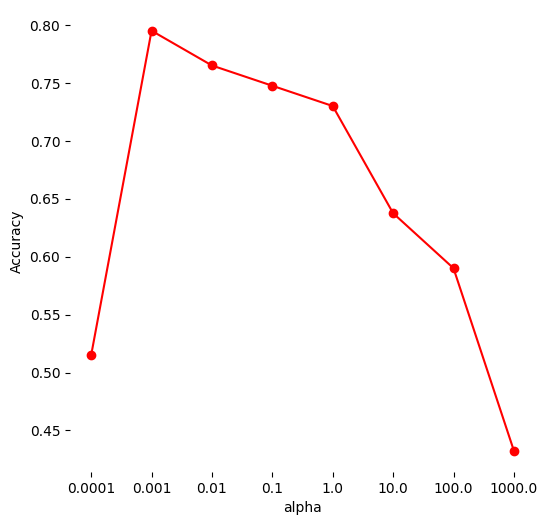

In [ ]:
from sklearn.model_selection import ParameterGrid
import parfit.parfit as pf


grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    'loss': ['log'], # logistic regression
    'penalty': ['l2'], # L2 Regularization. Add a penalty to reduces the overfitting
    'n_jobs': [-1]  # Run using all processors
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(
    SGDClassifier, paramGrid, X_train, y_train, X_test, y_test,
    metric = accuracy_score, scoreLabel = "Accuracy")

In [ ]:
print(bestModel, bestScore, sep='\n\n')

SGDClassifier(alpha=0.001, loss='log', n_jobs=-1)

0.795


5) деревья

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [ ]:
des_tree = DecisionTreeClassifier()
des_tree.fit(X_train, y_train)
y_pred = des_tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.755

In [ ]:
rf_clf = RandomForestClassifier(n_jobs=-1)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8275

In [ ]:
bg_clf = BaggingClassifier(n_jobs=-1)
bg_clf.fit(X_train, y_train)
y_pred = bg_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7875

In [ ]:
rf_clf = RandomForestClassifier(
    criterion="entropy", min_samples_leaf=3, n_jobs=-1
  )
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8375

6) Градиентный бустинг

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    max_depth=3, learning_rate=0.1, n_estimators=10
  )
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.83

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(
    max_depth=3, learning_rate=0.1, n_estimators=100
  )
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.82

7) CatBoost

In [ ]:
!pip install catboost
from google.colab import output
output.enable_custom_widget_manager()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier

cbst = CatBoostClassifier() # лучше указать параметры, но воспользуемся автоподбором
cbst.fit(X_train, y_train)
y_pred = cbst.predict(X_test)

Learning rate set to 0.079362
0:	learn: 1.4123292	total: 2.57ms	remaining: 2.57s
1:	learn: 1.2785872	total: 4.82ms	remaining: 2.4s
2:	learn: 1.1728860	total: 6.79ms	remaining: 2.26s
3:	learn: 1.0854272	total: 8.1ms	remaining: 2.02s
4:	learn: 1.0134762	total: 10.3ms	remaining: 2.06s
991:	learn: 0.1324260	total: 3.6s	remaining: 29ms
992:	learn: 0.1323030	total: 3.6s	remaining: 25.4ms
993:	learn: 0.1322127	total: 3.6s	remaining: 21.8ms
994:	learn: 0.1321242	total: 3.61s	remaining: 18.1ms
995:	learn: 0.1320292	total: 3.62s	remaining: 14.5ms
996:	learn: 0.1319327	total: 3.62s	remaining: 10.9ms
997:	learn: 0.1318209	total: 3.62s	remaining: 7.26ms
998:	learn: 0.1317704	total: 3.62s	remaining: 3.63ms
999:	learn: 0.1316810	total: 3.63s	remaining: 0us


In [ ]:
accuracy_score(y_test, y_pred)

0.825

8) MLP Classifier (перцептрон)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

In [ ]:
y_pred_mlp = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_mlp)
print (cm)
acc_mlp = accuracy_score(y_test, y_pred_mlp)
print (acc_mlp)

[[  0   0   0   0   7]
 [  0   0   1   0  57]
 [  0   0 156   0   5]
 [  0   0   0   1   0]
 [  0   0   0   0 173]]
0.825


9) Kernel SVM (опорные вектора)

In [ ]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred_svc_rbf = svc_rbf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svc_rbf)
print (cm)
acc_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)
print (acc_svc_rbf)

[[  0   0   0   0   7]
 [  0   0   1   0  57]
 [  0   0 140   0  21]
 [  0   0   0   1   0]
 [  0   0   6   0 167]]
0.77
